In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [43]:
dt = pd.read_csv('test.csv')

In [44]:
dy = pd.read_csv('gender_submission.csv')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [46]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


##Analysis


In [47]:
#analyze by describing
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [48]:
df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Harper, Miss. Annie Jessie ""Nina""",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


In [49]:
#analyze by pivotting
df[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived',ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [50]:
df[['Sex','Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [51]:
df[['SibSp','Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived',ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


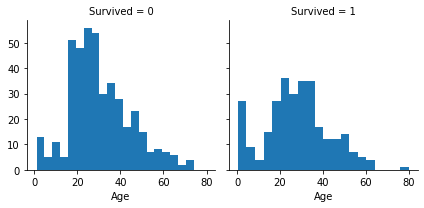

In [52]:
#analyze by visulize
g = sns.FacetGrid(df, col='Survived')
g.map(plt.hist,'Age',bins=20)

##Feature Engineering

In [53]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [54]:
imp = SimpleImputer(strategy='mean')
imp.fit_transform(df[['Age']])
imp.fit_transform(dt[['Age','Fare']])

array([[3.45000000e+01, 7.82920000e+00],
       [4.70000000e+01, 7.00000000e+00],
       [6.20000000e+01, 9.68750000e+00],
       [2.70000000e+01, 8.66250000e+00],
       [2.20000000e+01, 1.22875000e+01],
       [1.40000000e+01, 9.22500000e+00],
       [3.00000000e+01, 7.62920000e+00],
       [2.60000000e+01, 2.90000000e+01],
       [1.80000000e+01, 7.22920000e+00],
       [2.10000000e+01, 2.41500000e+01],
       [3.02725904e+01, 7.89580000e+00],
       [4.60000000e+01, 2.60000000e+01],
       [2.30000000e+01, 8.22667000e+01],
       [6.30000000e+01, 2.60000000e+01],
       [4.70000000e+01, 6.11750000e+01],
       [2.40000000e+01, 2.77208000e+01],
       [3.50000000e+01, 1.23500000e+01],
       [2.10000000e+01, 7.22500000e+00],
       [2.70000000e+01, 7.92500000e+00],
       [4.50000000e+01, 7.22500000e+00],
       [5.50000000e+01, 5.94000000e+01],
       [9.00000000e+00, 3.17080000e+00],
       [3.02725904e+01, 3.16833000e+01],
       [2.10000000e+01, 6.13792000e+01],
       [4.800000

In [55]:
ohn = OneHotEncoder(sparse=False, drop='first')
m = ohn.fit_transform(df[['Sex']])
m2 = ohn.fit_transform(dt[['Sex']])

In [56]:
df['Age'] = imp.fit_transform(df[['Age']])
dt[['Age','Fare']] = imp.fit_transform(dt[['Age','Fare']])

In [57]:
df['Sex'] = m
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1.0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0.0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1.0,35.0,0,0,373450,8.0500,NaN,S


In [58]:
dt['Sex'] = m2

In [59]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1.0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0.0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1.0,35.0,0,0,373450,8.0500,NaN,S


In [60]:
df.drop(columns=['PassengerId','Name','Cabin','Ticket','Embarked'], inplace=True)

In [61]:
from sklearn.preprocessing import scale
scale(df)

array([[-0.78927234,  0.82737724,  0.73769513, ...,  0.43279337,
        -0.47367361, -0.50244517],
       [ 1.2669898 , -1.56610693, -1.35557354, ...,  0.43279337,
        -0.47367361,  0.78684529],
       [ 1.2669898 ,  0.82737724, -1.35557354, ..., -0.4745452 ,
        -0.47367361, -0.48885426],
       ...,
       [-0.78927234,  0.82737724, -1.35557354, ...,  0.43279337,
         2.00893337, -0.17626324],
       [ 1.2669898 , -1.56610693,  0.73769513, ..., -0.4745452 ,
        -0.47367361, -0.04438104],
       [-0.78927234,  0.82737724,  0.73769513, ..., -0.4745452 ,
        -0.47367361, -0.49237783]])

##Modeling

In [62]:
from sklearn.linear_model import LogisticRegression

In [63]:
dt.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [64]:
X = df[['Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare']]
X_test = dt[['Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare']]
y = df['Survived']
y_test = dy[['Survived']]

In [65]:
model = LogisticRegression()
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [66]:
model.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [67]:
ypred = model.predict(X_test)

In [68]:
model.score(X_test,y_test)

0.9449760765550239

In [69]:
o= pd.DataFrame(y_test)

In [70]:
#compare
q = pd.DataFrame(ypred)

In [71]:
q.rename(columns = {0:'Survived2'}, inplace=True)
q

,Survived2
0,0
1,0
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [72]:
o.rename(columns = {0:'Survived'}, inplace=True)
o

,Survived
0,0
1,1
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [73]:
pd.concat([o,q], axis= 1)

,Survived,Survived2
0,0,0
1,1,0
2,0,0
3,0,0
4,1,1
...,...,...
413,0,0
414,1,1
415,0,0
416,0,0


In [74]:
send = pd.concat([dt['PassengerId'],q], axis= 1)
finish = send.set_index('PassengerId')

In [75]:
from google.colab import files
finish.to_csv('filename.csv') 
files.download('filename.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>